In [1]:
# !pip install panel
# !pip install plotly

In [2]:
# imports

import panel as pn
pn.extension('plotly')
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
import plotly.graph_objs as go
import seaborn as sns
import holoviews as hv
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Read in coordinate data

In [3]:
df_path = Path('all_df.csv')
all_df = pd.read_csv(df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [4]:
all_df.head()

corn  soybean_meal    hog    crush
Date                                            
2000-12-29  2.6175         176.3  47.50  95107.5
2001-01-02  2.5825         176.4  47.80  96582.5
2001-01-03  2.6100         175.2  47.15  94210.0
2001-01-04  2.6100         173.8  48.00  97070.0
2001-01-05  2.5800         171.7  48.00  97730.0

In [5]:
def create_date_vs_crush_plot():
    f =all_df.hvplot(x='Date', y='crush')
    return f

In [6]:
def standard_scaler_plot():
    std_scaler = StandardScaler()

    df_std_scaled = std_scaler.fit_transform(all_df.to_numpy())
    df_std_scaled = pd.DataFrame(df_std_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

    return df_std_scaled.hvplot()

In [7]:
def min_max_scaler_plot():
    mm_scaler = MinMaxScaler()
    df_mm_scaled = mm_scaler.fit_transform(all_df.to_numpy())
    df_mm_scaled = pd.DataFrame(df_mm_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

    return df_mm_scaled.hvplot()

In [8]:
df_adj = all_df.copy()
df_adj['corn'] = all_df['corn']*5000
df_adj['soybean_meal'] = all_df['soybean_meal']*100
df_adj['hog'] = all_df['hog']*400

df_adj

corn  soybean_meal      hog     crush
Date                                                
2000-12-29  13087.5       17630.0  19000.0   95107.5
2001-01-02  12912.5       17640.0  19120.0   96582.5
2001-01-03  13050.0       17520.0  18860.0   94210.0
2001-01-04  13050.0       17380.0  19200.0   97070.0
2001-01-05  12900.0       17170.0  19200.0   97730.0
...             ...           ...      ...       ...
2021-10-28  28137.5       33090.0  30080.0  123137.5
2021-10-29  28412.5       33260.0  30430.0  124942.5
2021-11-01  28950.0       32910.0  30460.0  123920.0
2021-11-02  28650.0       33720.0  29700.0  117930.0
2021-11-03  28200.0       34080.0  30380.0  124360.0

[5186 rows x 4 columns]

In [9]:
def corr_plot():
    corrM = df_adj.corr()
    mask = np.zeros_like(corrM)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10,7))
        ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")
    return f

In [10]:
def get_adj_totals():
    df_adj_totals = df_adj.copy()
    df_adj_totals['corn'] = df_adj_totals['corn']*3
    df_adj_totals['hog'] = df_adj_totals['hog']*8
    df_adj_totals['soybean_meal'] = df_adj_totals['soybean_meal']*1
    df_adj_totals['corn + soybean_meal'] = df_adj_totals['corn'] + df_adj_totals['soybean_meal']
    return df_adj_totals

In [11]:
def df_adj_totals_plot():
    df_adj_totals = df_adj.copy()
    df_adj_totals['corn'] = df_adj_totals['corn']*3
    df_adj_totals['hog'] = df_adj_totals['hog']*8
    df_adj_totals['soybean_meal'] = df_adj_totals['soybean_meal']*1
    df_adj_totals['corn + soybean_meal'] = df_adj_totals['corn'] + df_adj_totals['soybean_meal']
    return df_adj_totals.hvplot(x='Date', y=['hog', 'corn + soybean_meal'])

In [12]:
def mean_line_plot():
    mean_line = hv.HLine(all_df['crush'].mean())
    mean_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
    plot = all_df.hvplot(x='Date', y='crush', yformatter='%.0f')
    return plot * mean_line

In [13]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [14]:
# Plot z-scores of the ratio

def zscore_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    zscore_plot = all_df_z.hvplot(x='Date', y=['Z-Score'])
    z_zero_line = hv.HLine(0)
    z_zero_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
    z_plus_one = hv.HLine(1)
    z_plus_one.opts(color = 'orange', line_dash = 'dashed', line_width=2.0)
    z_minus_one = hv.HLine(-1)
    z_minus_one.opts(color = 'green', line_dash = 'dashed', line_width=2.0)
    z_plus_two = hv.HLine(2)
    z_plus_two.opts(color = 'red', line_dash = 'dashed', line_width=2.0)
    z_minus_two = hv.HLine(-2)
    z_minus_two.opts(color = 'purple', line_dash = 'dashed', line_width=2.0)

    return zscore_plot * z_zero_line * z_plus_one * z_minus_one * z_plus_two * z_minus_two


In [15]:
def feature_engineering_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    train = all_df_z.copy()
    feature_train = train['Z-Score']

    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
    f, ax = plt.subplots(figsize=(12, 6))
    ax.plot(feature_train.index, feature_train.values)
    ax.plot(ratios_mavg5.index, ratios_mavg5.values)
    ax.plot(ratios_mavg60.index, ratios_mavg60.values)
    plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
    plt.ylabel('Z-Score')
    return f


In [16]:
def rolling_ratio_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    train = all_df_z.copy()
    feature_train = train['Z-Score']
    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
    figure = plt.figure(figsize=(12,6))
    zscore_60_5.plot(grid=True)
    plt.axhline(0, color='black')
    plt.axhline(1.0, color='red', linestyle='--')
    plt.axhline(-1.0, color='green', linestyle='--')
    plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
    return figure

In [17]:
def buy_sell_signal_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    train = all_df_z.copy()
    feature_train = train['Z-Score']
    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
    figure = plt.figure(figsize=(12,6))
    feature_train[160:].plot()
    buy = feature_train.copy()
    sell = feature_train.copy()
    buy[zscore_60_5>-1] = 0
    sell[zscore_60_5<1] = 0
    buy[160:].plot(color='g', linestyle='None', marker='^')
    sell[160:].plot(color='r', linestyle='None', marker='^')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, train['Z-Score'].min(), train['Z-Score'].max()))
    plt.legend(['Z-Score', 'Buy Signal', 'Sell Signal'])
    return figure

In [18]:
def hog_corn_buy_sell_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    train = all_df_z.copy()
    feature_train = train['Z-Score']
    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
    buy = feature_train.copy()
    sell = feature_train.copy()
    buy[zscore_60_5>-1] = 0
    sell[zscore_60_5<1] = 0
    
    df_adj_totals = get_adj_totals()
    figure = plt.figure(figsize=(12,7))
    S1 = df_adj_totals['hog']
    S2 = df_adj_totals['corn + soybean_meal']

    S1[60:].plot(color='b')
    S2[60:].plot(color='c')
    buyR = 0*S1.copy()
    sellR = 0*S1.copy()

    # When you buy the ratio, you buy x and sell y
    buyR[buy!=0] = S1[buy!=0]
    sellR[buy!=0] = S2[buy!=0]

    # When you sell the ratio, you sell x and buy y
    buyR[sell!=0] = S2[sell!=0]
    sellR[sell!=0] = S1[sell!=0]

    buyR[60:].plot(color='g', linestyle='None', marker='^')
    sellR[60:].plot(color='r', linestyle='None', marker='^')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, min(S1.min(), S2.min())-30000, max(S1.max(), S2.max())+10000))

    plt.legend(['hog', 'corn + soybean_meal'])
    return figure

In [19]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    
    # intiliazae trading results dataframe
    trading_results = pd.DataFrame(index=S1.index, columns=['equity', 'ratios', 'countS1', 'countS2'])
    
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money, trading_results

In [20]:
def trading_plot():
    df_adj_totals = get_adj_totals()
    # Run the trading similuation and visualize the equity curve
    train_total_equity, train_trading_results = trade(df_adj_totals['hog'], df_adj_totals['corn + soybean_meal'], 60, 5)
    train_trading_results_plot = train_trading_results.dropna().hvplot(x='Date', y=['equity'], yformatter='%.0f')
    return train_trading_results_plot

In [21]:
# Create a Title for the Dashboard

title = pn.pane.Markdown("""
## Agricultural Futures
""")

In [22]:
# Create a tab layout for the dashboard

tabs = pn.Tabs(
    ("Crush",  pn.Column(create_date_vs_crush_plot)),
    ("Standard Scaler", pn.Column(standard_scaler_plot)),
    ("Min/Max Scaler", pn.Column(min_max_scaler_plot)),
    ("Totals Plot", pn.Column("Total",df_adj_totals_plot)),
    ("Mean Line Plot", pn.Column(mean_line_plot)),
    ("Z Score ", pn.Column(zscore_plot)),
    ("Feature Engineering plot", pn.Column(feature_engineering_plot)),
    ("Rolling Ratio Plot", pn.Column(rolling_ratio_plot)),
    ("Buy sell signal plot", pn.Column(buy_sell_signal_plot)),
    ("Hog Corn Buy Sell plot", pn.Column(hog_corn_buy_sell_plot)),
    ("Trading plot", pn.Column(trading_plot)),
    
    
    
    
    )

In [23]:
# Create the dashboard

dashboard = pn.Column(title, tabs)

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Curve, name='interactive01450')
        [1] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(NdOverlay, name='interactive01536')
        [2] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(NdOverlay, name='interactive01690')
        [3] Column
            [0] Markdown(str)
            [1] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(NdOverlay, name='interactive01846')
        [4] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Overlay, name='interactive01955')
        [5] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Overlay, name='interactive02065')
        [6] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive02272')
        [7] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive02279')
        [8] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive02286')
        [9] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive02293')
        [10] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Curve, name='interactive02300')
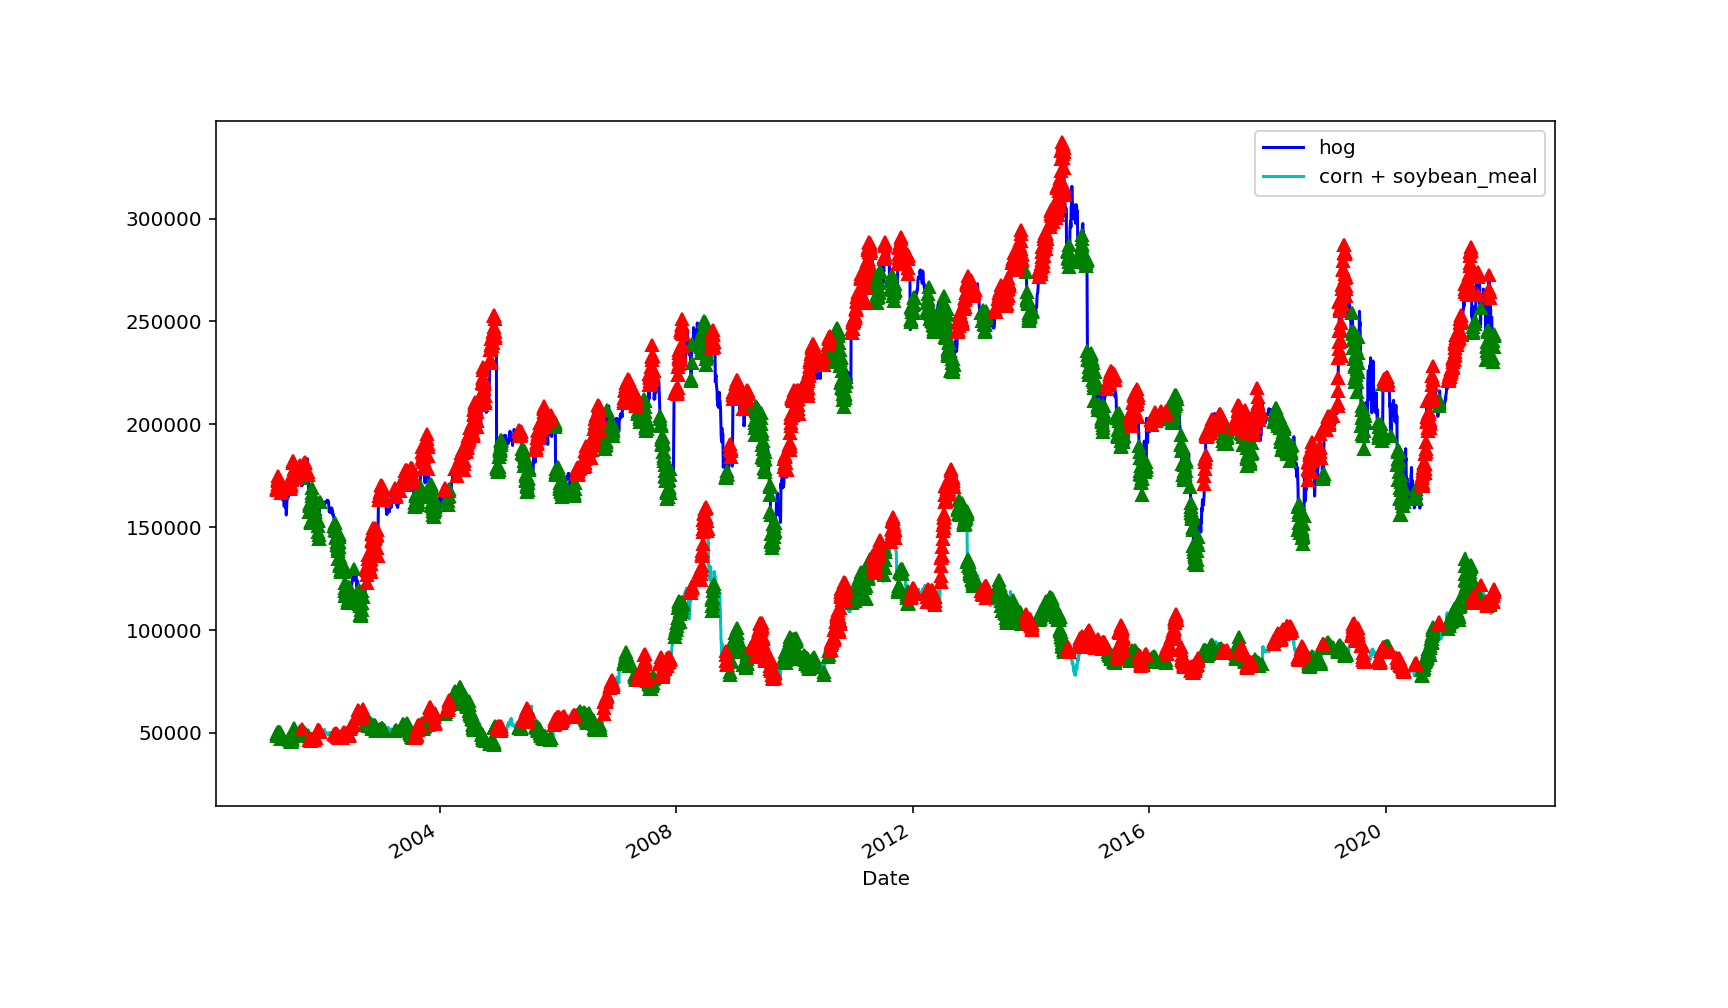
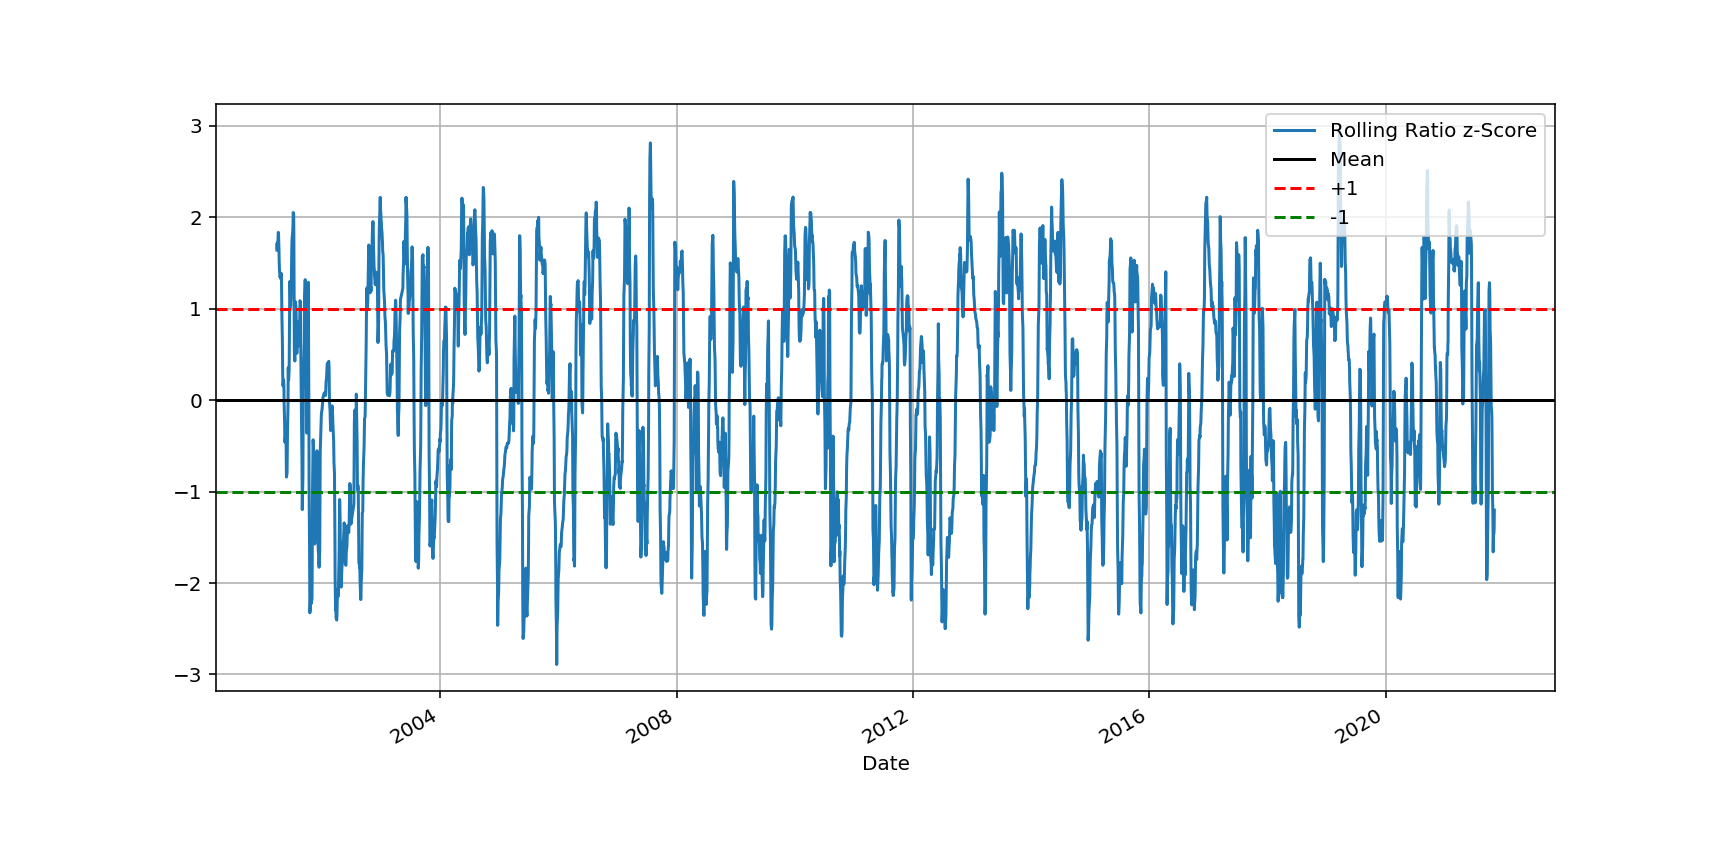
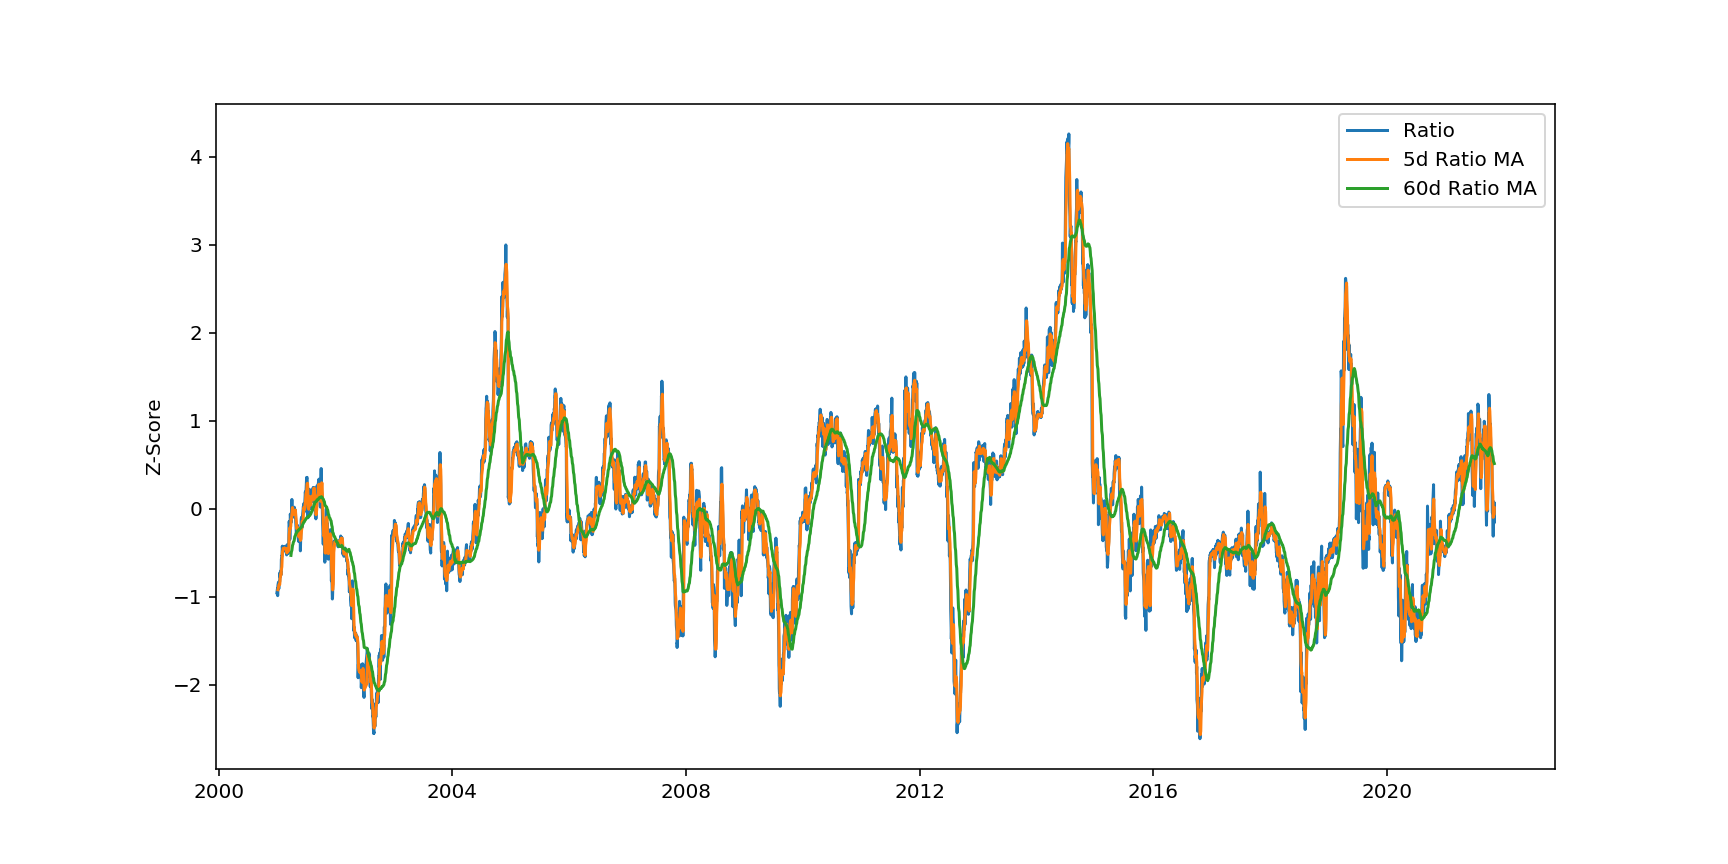
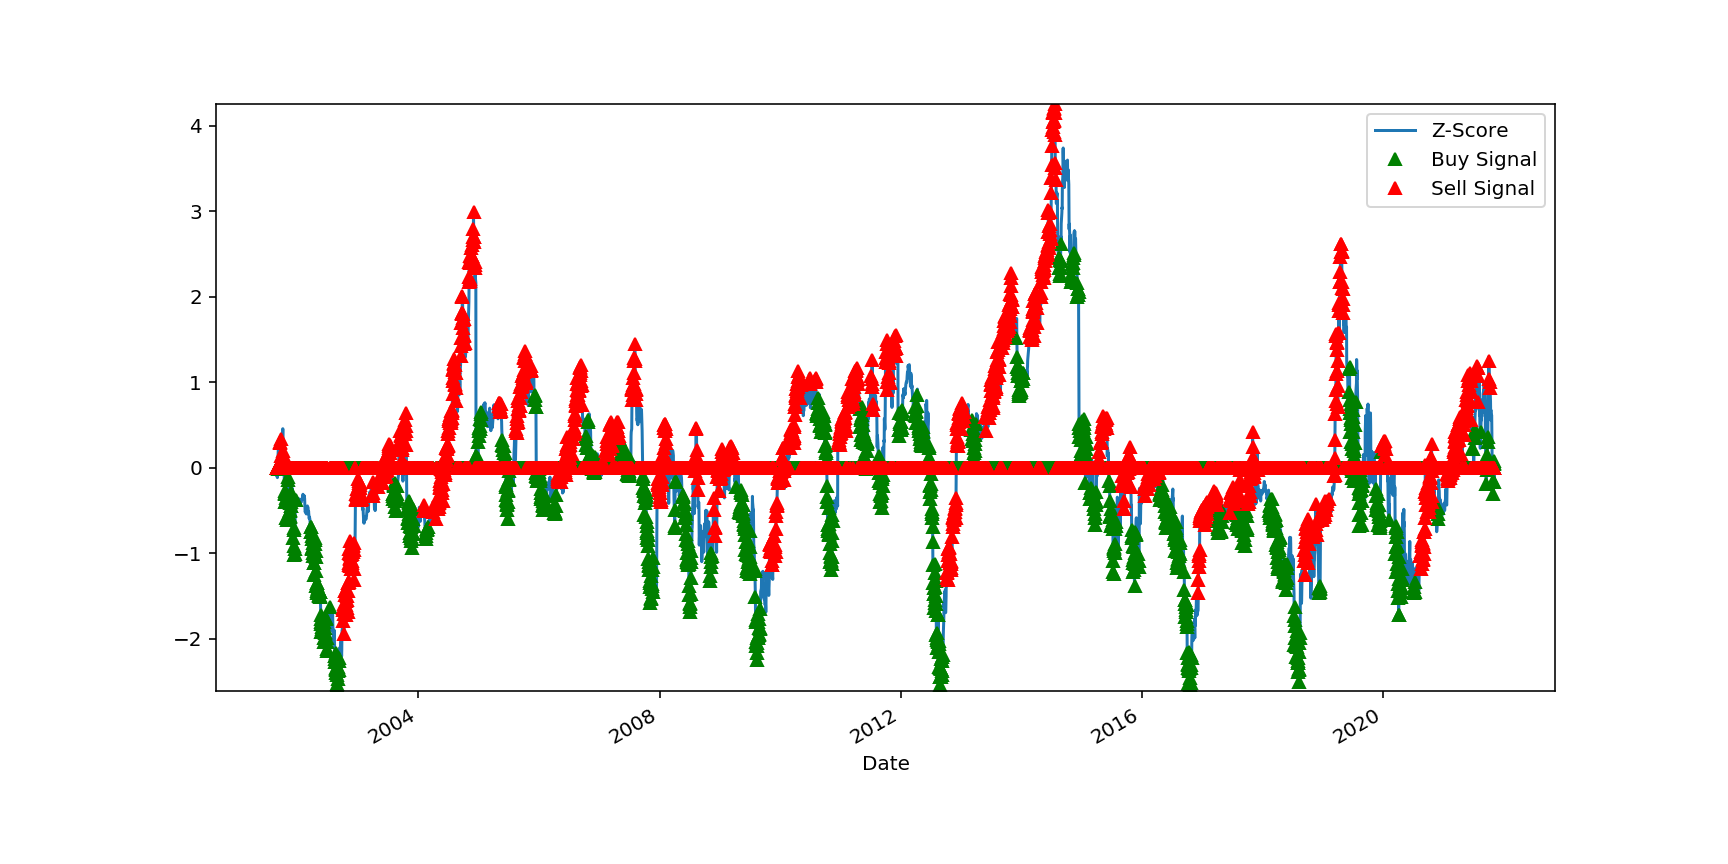

In [24]:
dashboard

In [25]:
# Serve the# dashboard

dashboard.show()

Launching server at http://localhost:62684
